## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [4]:
#1

from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 2.2 MB/s eta 0:03:00
   ---------------------------------------- 0.5/390.2 MB 5.1 MB/s eta 0:01:17
   ---------------------------------------- 0.9/390.2 MB 6.1 MB/s eta 0:01:04
   ---------------------------------------- 1.8/390.2 MB 9.4 MB/s eta 0:00:42
   ---------------------------------------- 2.6/390.2 MB 12.1 MB/s eta 0:00:33
   ---------------------------------------- 3.8/390.2 MB 13.5 MB/s eta 0:00:29
    --------------------------------------- 5.0/390.2 MB 15.9 MB/s eta 0:00:25
    --------------------------------------- 6.1/390.2 MB 17.1 MB/s eta 0:00:23
    --------------------------------------- 7.2/390.2 MB 17.7 MB/s eta 0:00:22
    --------------------------------------- 8.2/390.2 MB 18.2 MB/s eta

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Brian\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

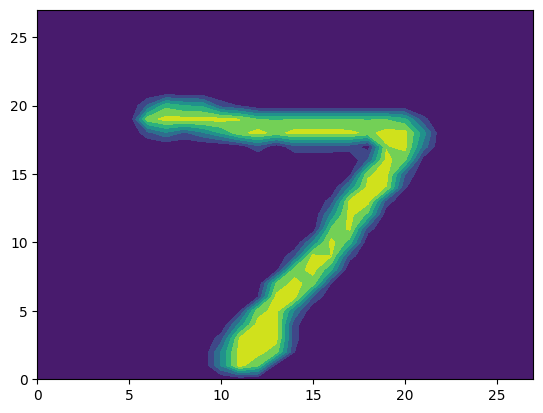

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

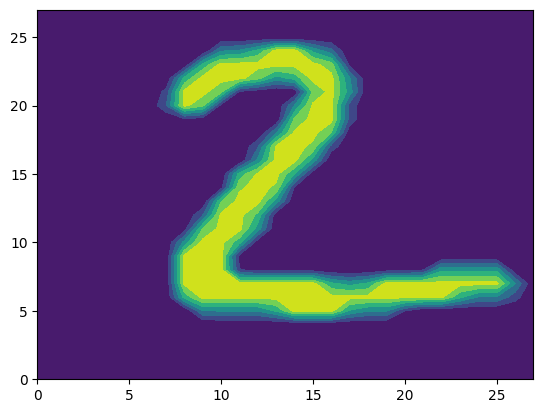

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

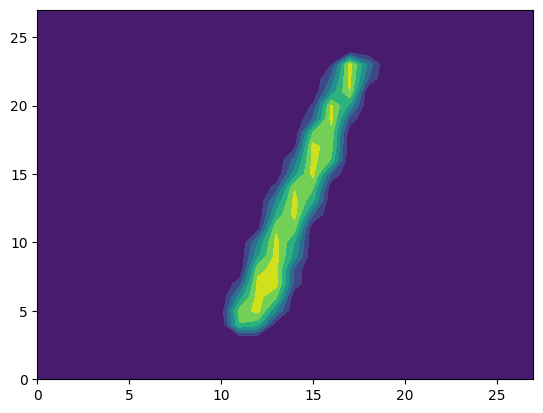

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

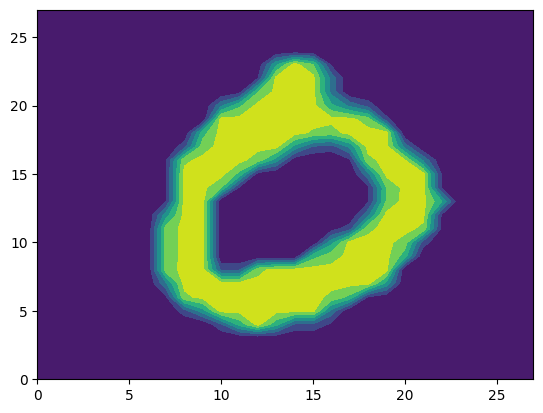

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

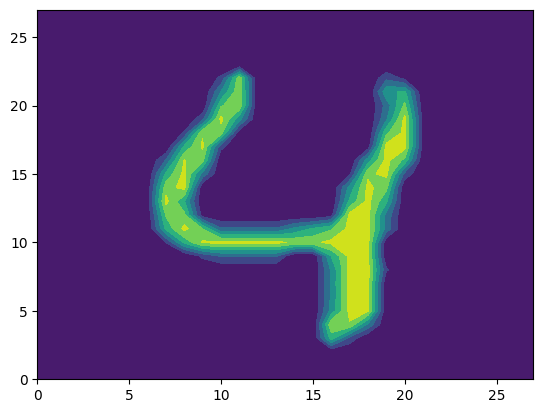

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

In [11]:
#2

print(X_train.shape) #shape of X_train
print(X_test.shape) #shape of X_test
print(X_train[i].shape) #shape of current X_train at i
print(X_test[i].shape) #shape of current X_test at i
print(y_train.shape) 
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


In [26]:
#3
import pandas as pd
import numpy as np

reload = 0  # Control the way data loads

if reload == 1:  # If reload is 1, do the reshaping process
    Z_train = []
    for i in range(60000):
        row = X_train[i].reshape((1, 784))  # Turn the matrix for i into a row vector of features
        Z_train.append(row[0])  # Append the row vector to the list
    Z_train = pd.DataFrame(Z_train)
    Z_train.to_csv(r'C:\Users\Brian\.vscode\knn\lab\data\Z_train.csv', index=False)  # Use raw string

    Z_test = []
    for i in range(len(y_test)):
        row = X_test[i].reshape((1, 784))  # Turn the matrix for i into a row vector of features
        Z_test.append(row[0])  # Append the row vector to the list
    Z_test = pd.DataFrame(Z_test)
    Z_test.to_csv(r'C:\Users\Brian\.vscode\knn\lab\data\Z_test.csv', index=False)  # Use raw string

else:  # If reload is not 1, just load the reshaped data
    Z_train = pd.read_csv(r'C:\Users\Brian\.vscode\knn\lab\data\Z_train.csv')
    Z_test = pd.read_csv(r'C:\Users\Brian\.vscode\knn\lab\data\Z_test.csv')


Current k:  1
Current k:  2
Current k:  3
Current k:  4
Current k:  5
Current k:  6
Current k:  7
Current k:  8
Current k:  9
Current k:  10
Current k:  11
Current k:  12
Current k:  13
Current k:  14
Current k:  15
Current k:  16
Current k:  17
Current k:  18
Current k:  19
Current k:  20
[3]


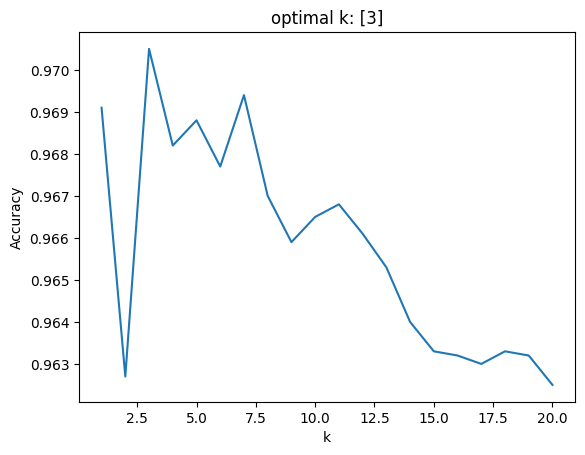

In [27]:
#4

from sklearn.neighbors import KNeighborsClassifier

# Determine the optimal k:
k_bar = 20
accuracy = []

for k in range(k_bar):
    print('Current k: ' , str(k+1))
    knn = KNeighborsClassifier(n_neighbors=k+1) # Create classifier instance
    predictor = knn.fit(Z_train.values,y_train) # Fit model
    accuracy.append( predictor.score(Z_test.values,y_test) ) # Store accuracy; bug in sklearn requires .values

accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.where(accuracy==accuracy_max)[0]
k_star = max_index+1 # Find the optimal value of k
print(k_star)

plt.plot(np.arange(1,k_bar+1),accuracy) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k: "+str(k_star))
plt.ylabel('Accuracy')
plt.show()

In [28]:
#5
knn = KNeighborsClassifier(n_neighbors=1)
predictor = knn.fit(Z_train.values,y_train) 
y_hat = predictor.predict(Z_test.values) 

#produces the accuracy
accuracy = knn.score(Z_test.values,y_test)
print('Accuracy: ', accuracy)

pd.crosstab(y_test, y_hat)

Accuracy:  0.9691


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,1,0,0,1,3,1,0,0
1,0,1129,3,0,1,1,1,0,0,0
2,7,6,992,5,1,0,2,16,3,0
3,0,1,2,970,1,19,0,7,7,3
4,0,7,0,0,944,0,3,5,1,22
5,1,1,0,12,2,860,5,1,6,4
6,4,2,0,0,3,5,944,0,0,0
7,0,14,6,2,4,0,0,992,0,10
8,6,1,3,14,5,13,3,4,920,5


5. With a value of k=3, this rule is 96.91% accurate on the test set. It tends to make mistakes confusing 4 for 9, 3 for 5, or 2 for 7, which it rarely does mistake.

6. Biggest mistakes are 4 for 9 (22), 3 for 5 (19), and 2 for 7 (16). These numbers are pretty similar looking so it makes sense why a computer might confuse them.

7. The data we used already uses intensity for each pixel in the grid. We could then have three of these matrices - one for each color - that gauges the intensity of each color. These would then be reshaped and put in a row side by side to create data similar to how we just did it.